In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 성일정보고등학교 학생 데이터
# 변수명 => SHD

In [2]:
SHD = pd.read_csv('data/1급-기밀파일.csv', encoding='cp949')
SHD.head(1)

,타임스탬프,학년,성별,학과,취미,개인공부시간,공부 시간대,기대연봉,학과 만족여부,전공 선호도,소셜미디어 사용시간,등교시간,하교시간,하교후 가는 곳,학업 스트레스,친구관계,알바,방과후 여부
0,2023. 10. 12 오후 12:21:46,2학년,남자,창업마케팅과,운동,1시간-2시간,방과후(저녁),3천만원,O,5,1시간-2시간,10-30분,18시 이후!,학원 또는 방과후,좋음,나쁨,X,O


# 1,2,3학년 별 설문 참여도 (1학년 최고)

In [3]:
SHD['학년'].value_counts()
# 학년별 설문조사 참여 수

1학년    129
2학년    107
3학년     29
Name: 학년, dtype: int64

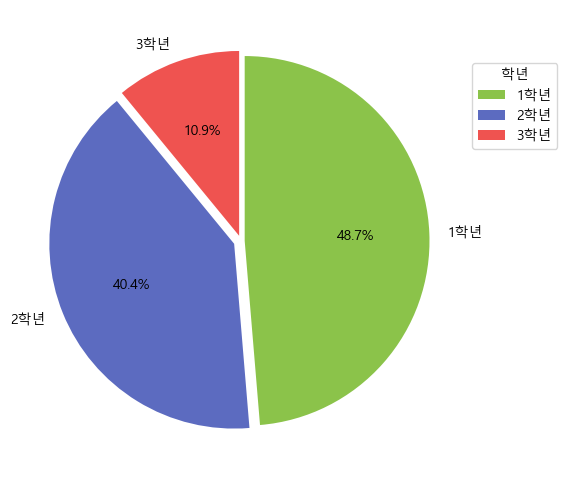

In [4]:
plt.rc('font',family='Malgun Gothic')

plt.figure(figsize=(10,6))
explode=[0.02,0.04,0.03]
colors = ['#8BC34A','#5C6BC0','#EF5350']
labels=['1학년','2학년','3학년']
plt.pie(SHD['학년'].value_counts(),
        labels=labels,
        autopct='%.1f%%',
        counterclock=False,
        startangle=90,
        explode=explode,
        colors=colors,
       )
plt.legend(loc=(1, 0.7),title = '학년')
plt.show()

# 7개 학과 별 설문 참여도 (전산계열이 압도적)

In [5]:
SHD['학과'].value_counts()
# 학과별 설문조사 참여 수

소프트웨어개발과    97
스마트웹콘텐츠과    55
창업마케팅과      42
부사관과        34
금융경영과       28
뷰티디자인과       5
회계정보과        4
Name: 학과, dtype: int64

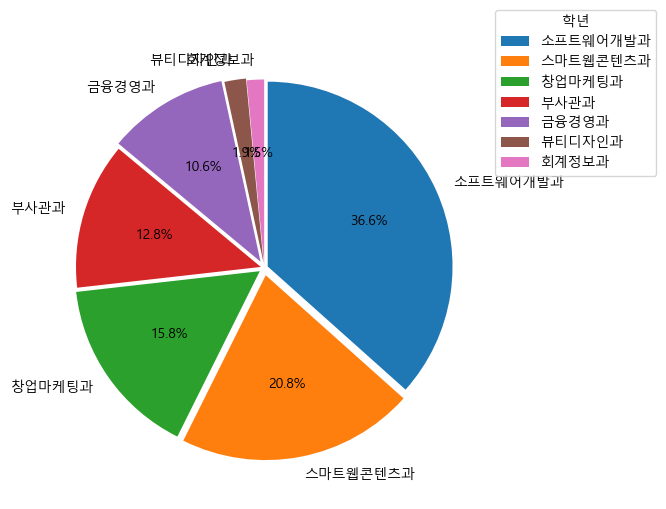

In [6]:
plt.rc('font',family='Malgun Gothic')

plt.figure(figsize=(10,6))
explode=[0.02,0.04,0.03,0.02,0.04,0.03,0.02]
labels=['소프트웨어개발과','스마트웹콘텐츠과','창업마케팅과',
        '부사관과','금융경영과','뷰티디자인과','회계정보과']
plt.pie(SHD['학과'].value_counts(),
        labels=labels,
        autopct='%.1f%%',
        counterclock=False,
        startangle=90,
        explode=explode,
       )
plt.legend(loc=(1, 0.7),title = '학년')
plt.show()

# 학과별에 따른 학년별 설문 참여도

In [7]:
SHD.groupby(['학년','학과'])[['학년']].count()

학년
학년  학과          
1학년 금융경영과     14
    부사관과      23
    소프트웨어개발과  44
    스마트웹콘텐츠과  25
    창업마케팅과    20
    회계정보과      3
2학년 금융경영과     11
    부사관과      11
    소프트웨어개발과  40
    스마트웹콘텐츠과  23
    창업마케팅과    22
3학년 금융경영과      3
    뷰티디자인과     5
    소프트웨어개발과  13
    스마트웹콘텐츠과   7
    회계정보과      1

# 학년별로 추출해 SHD_0 형식으로 변수 저장

In [8]:
SHD_1 = SHD[SHD['학년']=='1학년'] # 1학년 데이터만 추출(변수 저장)
SHD_2 = SHD[SHD['학년']=='2학년'] # 2학년 데이터만 추출(변수 저장)
SHD_3 = SHD[SHD['학년']=='3학년'] # 3학년 데이터만 추출(변수 저장)

# 그래프 예시 테스트

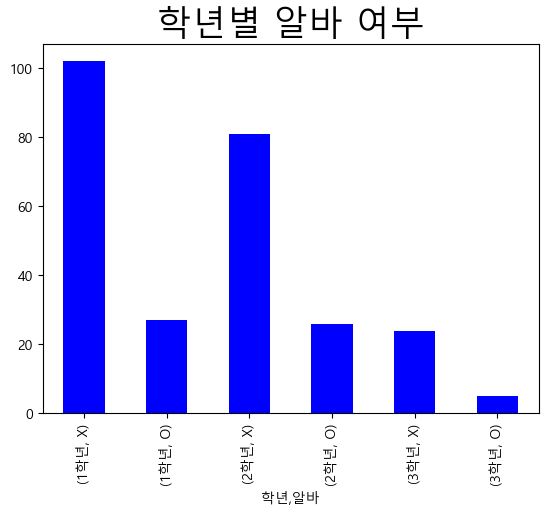

In [9]:
SHD.groupby('학년')['알바'].value_counts().plot(kind='bar', color='blue') #학년 그룹 알바 컬럼 나열
plt.rc('font',family='Malgun Gothic') # 텍스트 한글 패치
plt.title('학년별 알바 여부', fontsize=25) # 제목 텍스트 크기
plt.show()

# 전학년 소셜미디어 사용시간

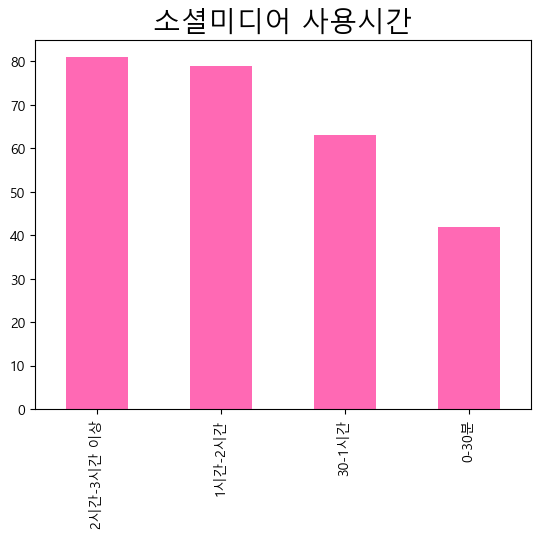

In [10]:
SHD['소셜미디어 사용시간'].value_counts().plot(kind='bar', color='hotpink')
plt.title('소셜미디어 사용시간', fontsize=20) # 제목 텍스트 크기
plt.show()

# 성일정보고등학교 전공 선호도는
- 1학년은 평균 6점
- 2학년은 평균 7점
- 3학년은 평균 5점

# 평균적으로 10점 만점 중 6점이다.

Text(0.5, 1.0, '학년 별 전공선호도 평균')

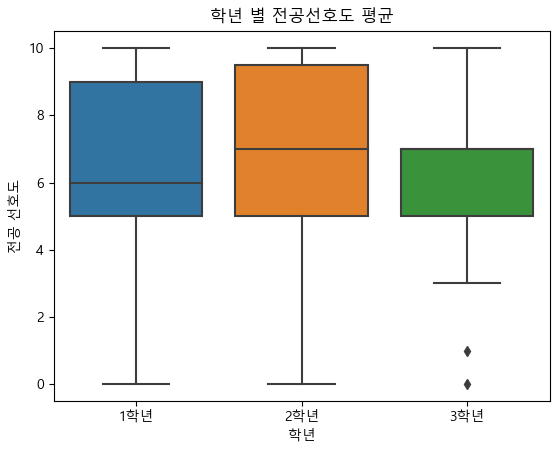

In [11]:
sns.boxplot(data=SHD, x='학년', y='전공 선호도', order=['1학년','2학년','3학년'])
plt.title('학년 별 전공선호도 평균')
# 박스 안에 있는 선은 평균을 나타냅니다.

# 학생들의 취미를 조사해보았다

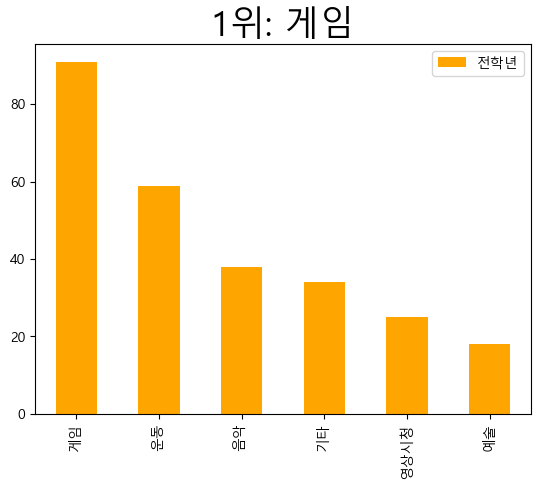

In [12]:
SHD['취미'].value_counts().plot(kind='bar', color='orange', label='전학년')
plt.title('1위: 게임',fontsize=25)
plt.legend()

# new_SHD 변수에 데이터가 동등하게
# 남자를 랜덤으로 88명 뽑아주었다.

In [13]:
male = SHD[SHD['성별']=='남자'].sample(n = 88)
female = SHD[SHD['성별']=='여자']

# 전

In [14]:
SHD['성별'].value_counts()

남자    177
여자     88
Name: 성별, dtype: int64

# 후

In [15]:
new_SHD = pd.concat([male,female])
new_SHD['성별'].value_counts()

남자    88
여자    88
Name: 성별, dtype: int64

Text(0.5, 1.0, '우리학교 학생 성별에 따른 취미')

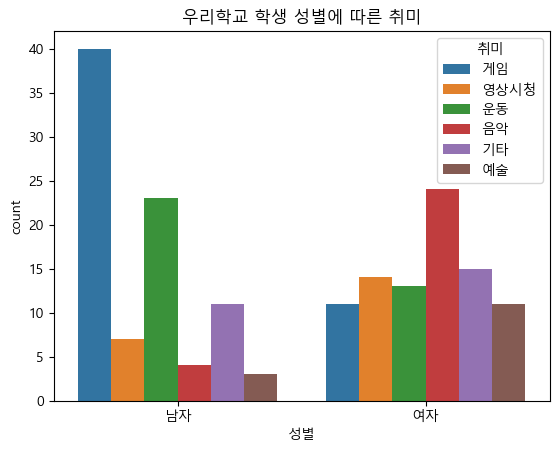

In [16]:
sns.countplot(data=new_SHD, x='성별', hue='취미')
plt.title('우리학교 학생 성별에 따른 취미')

# 3학년은 방과후를 안 하기 때문에
# SHD_12 라는 변수에 위에 만든 1,2학년을 넣어준다.

In [17]:
SHD_12 = pd.concat([SHD_1,SHD_2])

Text(0.5, 1.0, '1,2학년 방과후 여부')

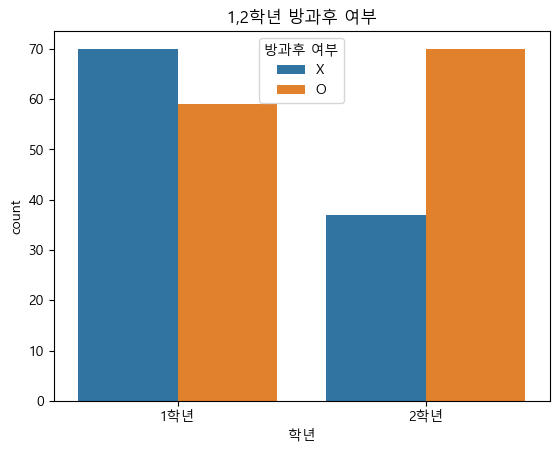

In [18]:
sns.countplot(data=SHD_12, x='학년', hue='방과후 여부')
plt.title('1,2학년 방과후 여부')

In [19]:
SHD['학년'].value_counts()

1학년    129
2학년    107
3학년     29
Name: 학년, dtype: int64

In [20]:
plt.matplotlib.style.use('ggplot')

# 취미 별 소셜미디어 사용시간

Text(0.5, 1.0, '소셜미디어 사용시간')

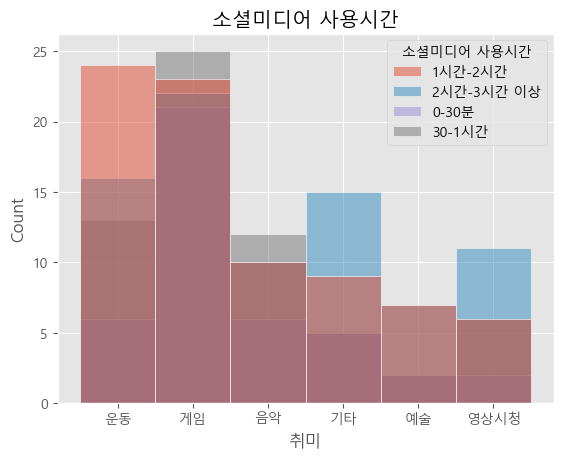

In [49]:
sns.histplot(data = SHD, x='취미', hue='소셜미디어 사용시간')
plt.title('소셜미디어 사용시간')

## 분석 결과: 취미가 게임인 사람들은 다른 취미에 비해 소셜미디어 사용시간이 많은 것을 알 수 있다.

# 1학년 전공선호도

Text(0.5, 1.0, '1학년')

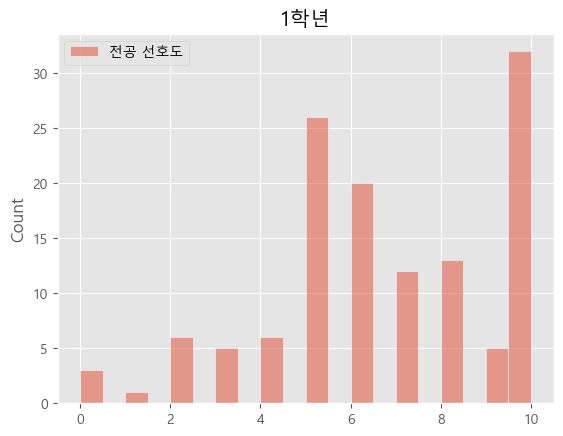

In [22]:
sns.histplot(data=SHD_1, bins=20)
plt.title('1학년')

# 2학년 전공선호도

Text(0.5, 1.0, '2학년')

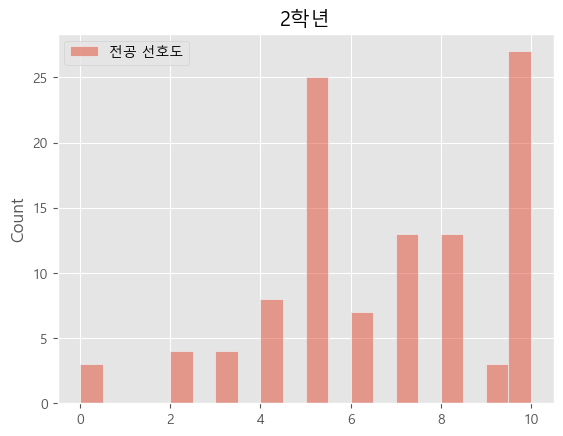

In [23]:
sns.histplot(data=SHD_2, bins=20)
plt.title('2학년')

# 3학년 전공선호도

Text(0.5, 1.0, '3학년')

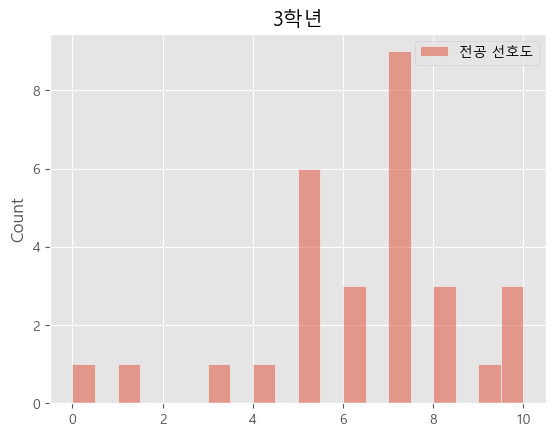

In [24]:
sns.histplot(data=SHD_3, bins=20)
plt.title('3학년')

Text(0.5, 1.0, '학년 별 전공선호도')

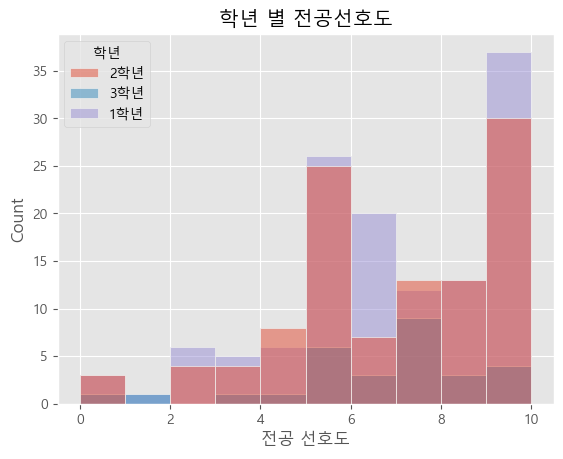

In [25]:
sns.histplot(data=SHD, x='전공 선호도', hue='학년')
plt.title('학년 별 전공선호도')

Text(0.5, 1.0, '학교 끝나고 바로 가는 곳')

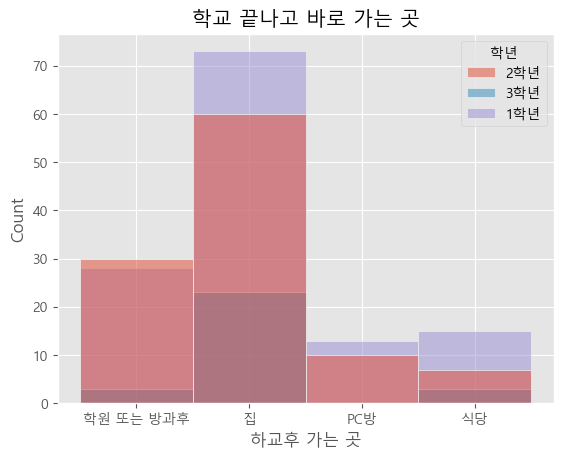

In [26]:
sns.histplot(data=SHD, x='하교후 가는 곳', hue='학년')
plt.title('학교 끝나고 바로 가는 곳')

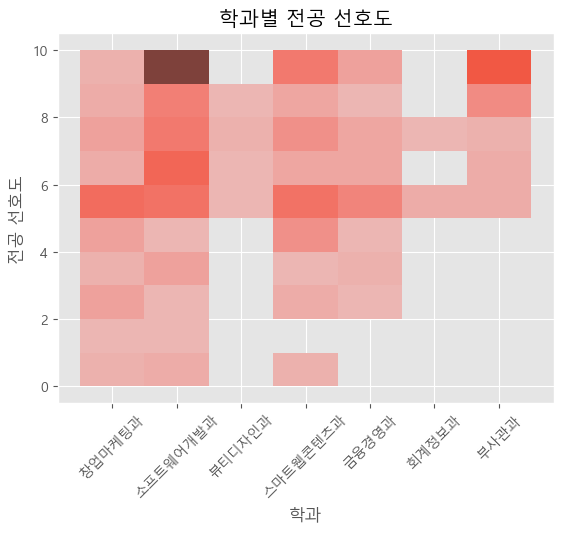

In [55]:
sns.histplot(data=SHD, x='학과', y='전공 선호도')
plt.title('학과별 전공 선호도')
plt.xticks(rotation=45)
plt.show()

In [28]:
SHD['기대연봉']

0          3천만원
1          2500
2          3000
3          3200
4          123억
         ...   
260    20000000
261        4천만원
262          5억
263        4000
264          1억
Name: 기대연봉, Length: 265, dtype: object

In [29]:
SHD[['기대연봉','학과']]

,기대연봉,학과
0,3천만원,창업마케팅과
1,2500,창업마케팅과
2,3000,소프트웨어개발과
3,3200,소프트웨어개발과
4,123억,창업마케팅과
...,...,...
260,20000000,부사관과
261,4천만원,부사관과
262,5억,부사관과
263,4000,스마트웹콘텐츠과


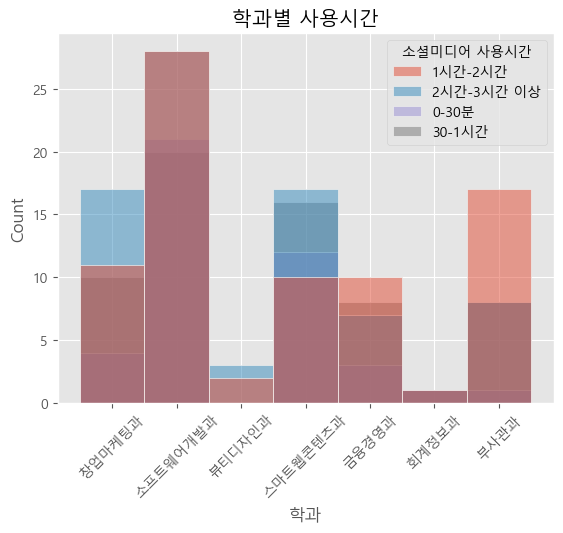

In [30]:
sns.histplot(data=SHD, x='학과' , hue='소셜미디어 사용시간')
plt.title('학과별 사용시간')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, '친구관계 스트레스')

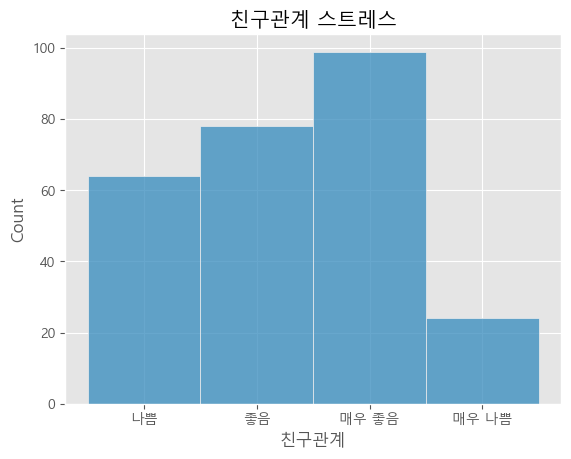

In [35]:
sns.histplot(data=SHD, x='친구관계')
plt.title('친구관계 스트레스')